# Digital Nomads Jobs Analysis

##### by @Santiago Huerdo

In this project you will find an exploratory analysis of data related to the types of jobs and their conditions of digital nomads, based on information collected from the website www.nomadlist.com, in which we will try to find out how the different professions are distributed, their salary ranges, the locations of the companies, and their possible correlations.

#### Import libraries

In [1]:
# Processing
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
import pylab
from scipy.stats import shapiro
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

print('Libraries imported succesfully.')

Libraries imported succesfully.


#### Import data

In [2]:
df = pd.read_csv('digitalnomads.csv')
print('Dataframe created succesfully.')

Dataframe created succesfully.


### Exploratory Data Analysis

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,DevOps Engineer,90000,USD,90000,US,100,US,M
1,2021e,EN,FT,Cybersecurity Analyst,80000,USD,80000,US,50,US,L
2,2021e,EN,FT,Machine Learning Engineer,85000,USD,85000,NL,100,DE,S
3,2021e,MI,FT,Business Operations Manager,125000,USD,125000,CA,100,US,S
4,2020,MI,FT,Business Intelligence Analyst,100000,USD,100000,US,100,US,L


In [4]:
print('This dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This dataset contains 525 rows and 11 columns.


In [5]:
# Dataset columns.
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
# Info about total values, missing values, types of values, columns name and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           525 non-null    object
 1   experience_level    525 non-null    object
 2   employment_type     525 non-null    object
 3   job_title           525 non-null    object
 4   salary              525 non-null    int64 
 5   salary_currency     525 non-null    object
 6   salary_in_usd       525 non-null    int64 
 7   employee_residence  525 non-null    object
 8   remote_ratio        525 non-null    int64 
 9   company_location    525 non-null    object
 10  company_size        525 non-null    object
dtypes: int64(3), object(8)
memory usage: 45.2+ KB


In [7]:
# Searching for missing values in the dataset
df.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [8]:
# Searching for missing values in the dataset.
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# Basic statistics on numerical columns.
df.describe()

,salary,salary_in_usd,remote_ratio
count,5.250000e+02,5.250000e+02,525.000000
mean,3.460918e+05,1.140355e+05,82.666667
std,1.759602e+06,2.268361e+05,25.743400
min,1.100000e+02,1.100000e+01,0.000000
25%,6.000000e+04,5.500000e+04,50.000000
50%,1.100000e+05,9.475800e+04,100.000000
75%,1.600000e+05,1.368200e+05,100.000000
max,3.040000e+07,5.000000e+06,100.000000


### Data Cleaning

##### Proceed to look for typing errors in the columns of the dataset.

In [10]:
# We remove the character "e" from the column.
df['work_year'].head()

0    2021e
1    2021e
2    2021e
3    2021e
4     2020
Name: work_year, dtype: object

In [11]:
df['work_year'] = df['work_year'].str.replace('e','').astype('int64')

In [12]:
# Done.
df[['work_year']].head()

,work_year
0,2021
1,2021
2,2021
3,2021
4,2020


#### Remove unnecessary columns

##### In this case it will be the columns 'salary' and 'salary_currency' as we will only work with the column 'salary_in_usd'.

In [13]:
df.drop(["salary", "salary_currency"], axis=1, inplace=True)

In [14]:
# Done.
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,DevOps Engineer,90000,US,100,US,M
1,2021,EN,FT,Cybersecurity Analyst,80000,US,50,US,L
2,2021,EN,FT,Machine Learning Engineer,85000,NL,100,DE,S
3,2021,MI,FT,Business Operations Manager,125000,CA,100,US,S
4,2020,MI,FT,Business Intelligence Analyst,100000,US,100,US,L


#### Detecting and Eliminating Outliers

##### First look the distribution of the 'salary_in_usd' column.

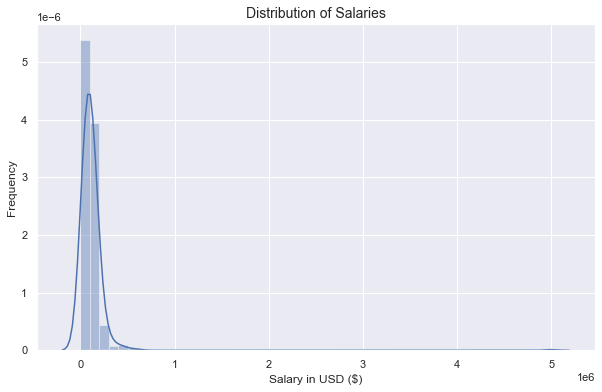

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df['salary_in_usd'])
plt.title('Distribution of Salaries', fontsize=14)
plt.ylabel('Frequency')
plt.xlabel('Salary in USD ($)')
plt.show()

##### Detecting outliers in 'salary_in_usd' column.

In [16]:
# Minimium value of the column.
df['salary_in_usd'].min()

11

In [17]:
# Maximum value of the column.
df['salary_in_usd'].max()

5000000

In [18]:
# Mean value of the column.
df['salary_in_usd'].mean()

114035.54476190476

In [19]:
# Median value of the column.
df['salary_in_usd'].median()

94758.0

#### Box plot of the column.

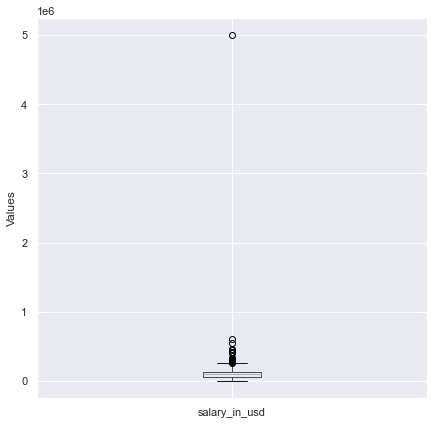

In [20]:
# Visualization
df.boxplot(column=['salary_in_usd'], figsize=(7, 7))
plt.ylabel('Values')
plt.show()

#### Eliminating outliers found through IQR (Inter Quantile Range).

In [21]:
# Quantile 25%
Q1 = df['salary_in_usd'].quantile(0.25)
Q1

55000.0

In [22]:
# Quantile 75%
Q3 = df['salary_in_usd'].quantile(0.75)
Q3

136820.0

In [23]:
# IQR Method.
IQR = Q3 - Q1
IQR

81820.0

In [24]:
# Calculating lower limit value.
lower_limit = Q1 - 1.5*IQR

In [25]:
# Calculating upper limit value.
upper_limit = Q3 + 1.5*IQR

In [26]:
# Minimum and maximum limit values.
lower_limit, upper_limit

(-67730.0, 259550.0)

In [27]:
# Removing outliers from the column.
df = df[(df['salary_in_usd'] > lower_limit) & (df['salary_in_usd'] < upper_limit)]

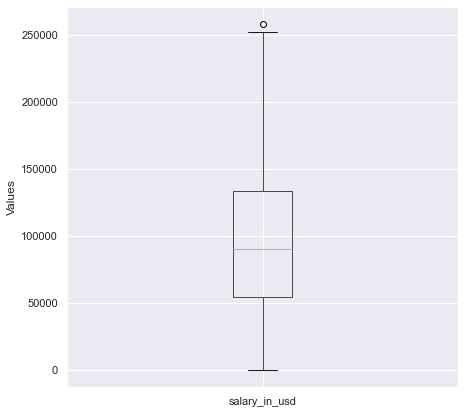

In [28]:
# Visualization
df.boxplot(column=['salary_in_usd'], figsize=(7, 7))
plt.ylabel('Values')
plt.show()

#### Reviewing the results of the column.

In [29]:
df['salary_in_usd'].describe()

count       505.000000
mean      94786.578218
std       54648.517395
min          11.000000
25%       54348.000000
50%       89945.000000
75%      133830.000000
max      258000.000000
Name: salary_in_usd, dtype: float64

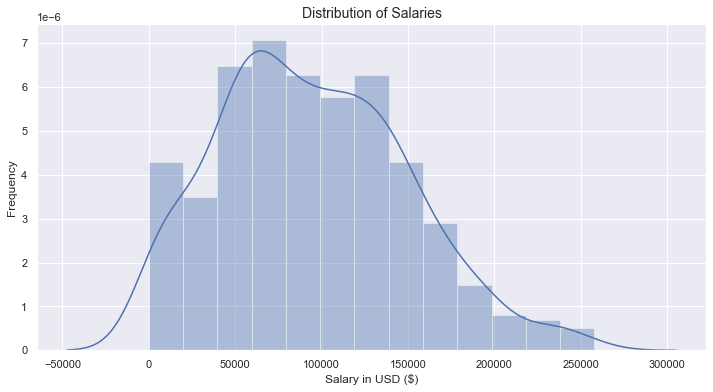

In [30]:
# Histogram salaries distribution.
plt.figure(figsize=(12,6))
sns.distplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries', fontsize=14)
plt.ylabel('Frequency')
plt.xlabel('Salary in USD ($)')
plt.show()

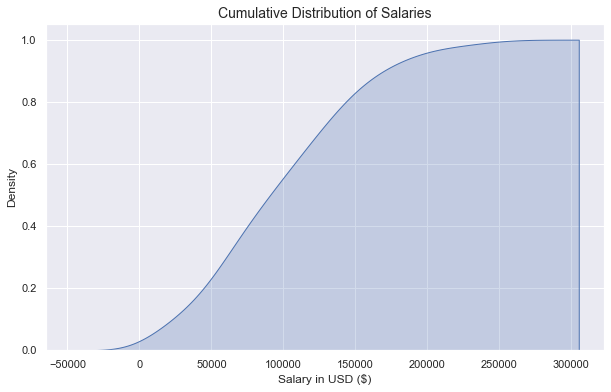

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['salary_in_usd'], cumulative =True, shade=True);
plt.title('Cumulative Distribution of Salaries', fontsize=14)
plt.xlabel('Salary in USD ($)')
plt.show()

##### Checking normality in the distribution of salaries

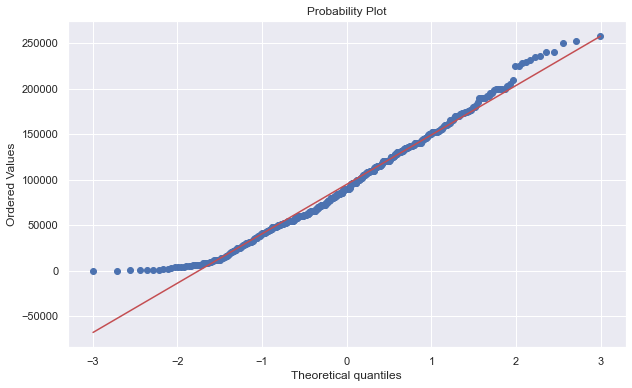

In [32]:
plt.figure(figsize=(10,6))
stats.probplot(df['salary_in_usd'], dist='norm',plot=pylab)
pylab.show()

In [33]:
estadistict, p_value = shapiro(df['salary_in_usd'])
print('Estadistict = %.3f | p_value = %.3f' % (estadistict, p_value))

Estadistict = 0.980 | p_value = 0.000


### Analyzing the data searching interesting patterns and correlations.

#### Analysing the types of jobs.

In [34]:
jobs = df['job_title'].value_counts().sort_values(ascending=True)
jobs

Software Engineer in Test              1
Principal Security Engineer            1
Principal Engineer                     1
Lead Application Security Engineer     1
Software Support                       1
                                      ..
Security Engineer                     16
Cyber Security Analyst                20
Penetration Tester                    20
DevOps Engineer                       24
Data Scientist                        27
Name: job_title, Length: 152, dtype: int64

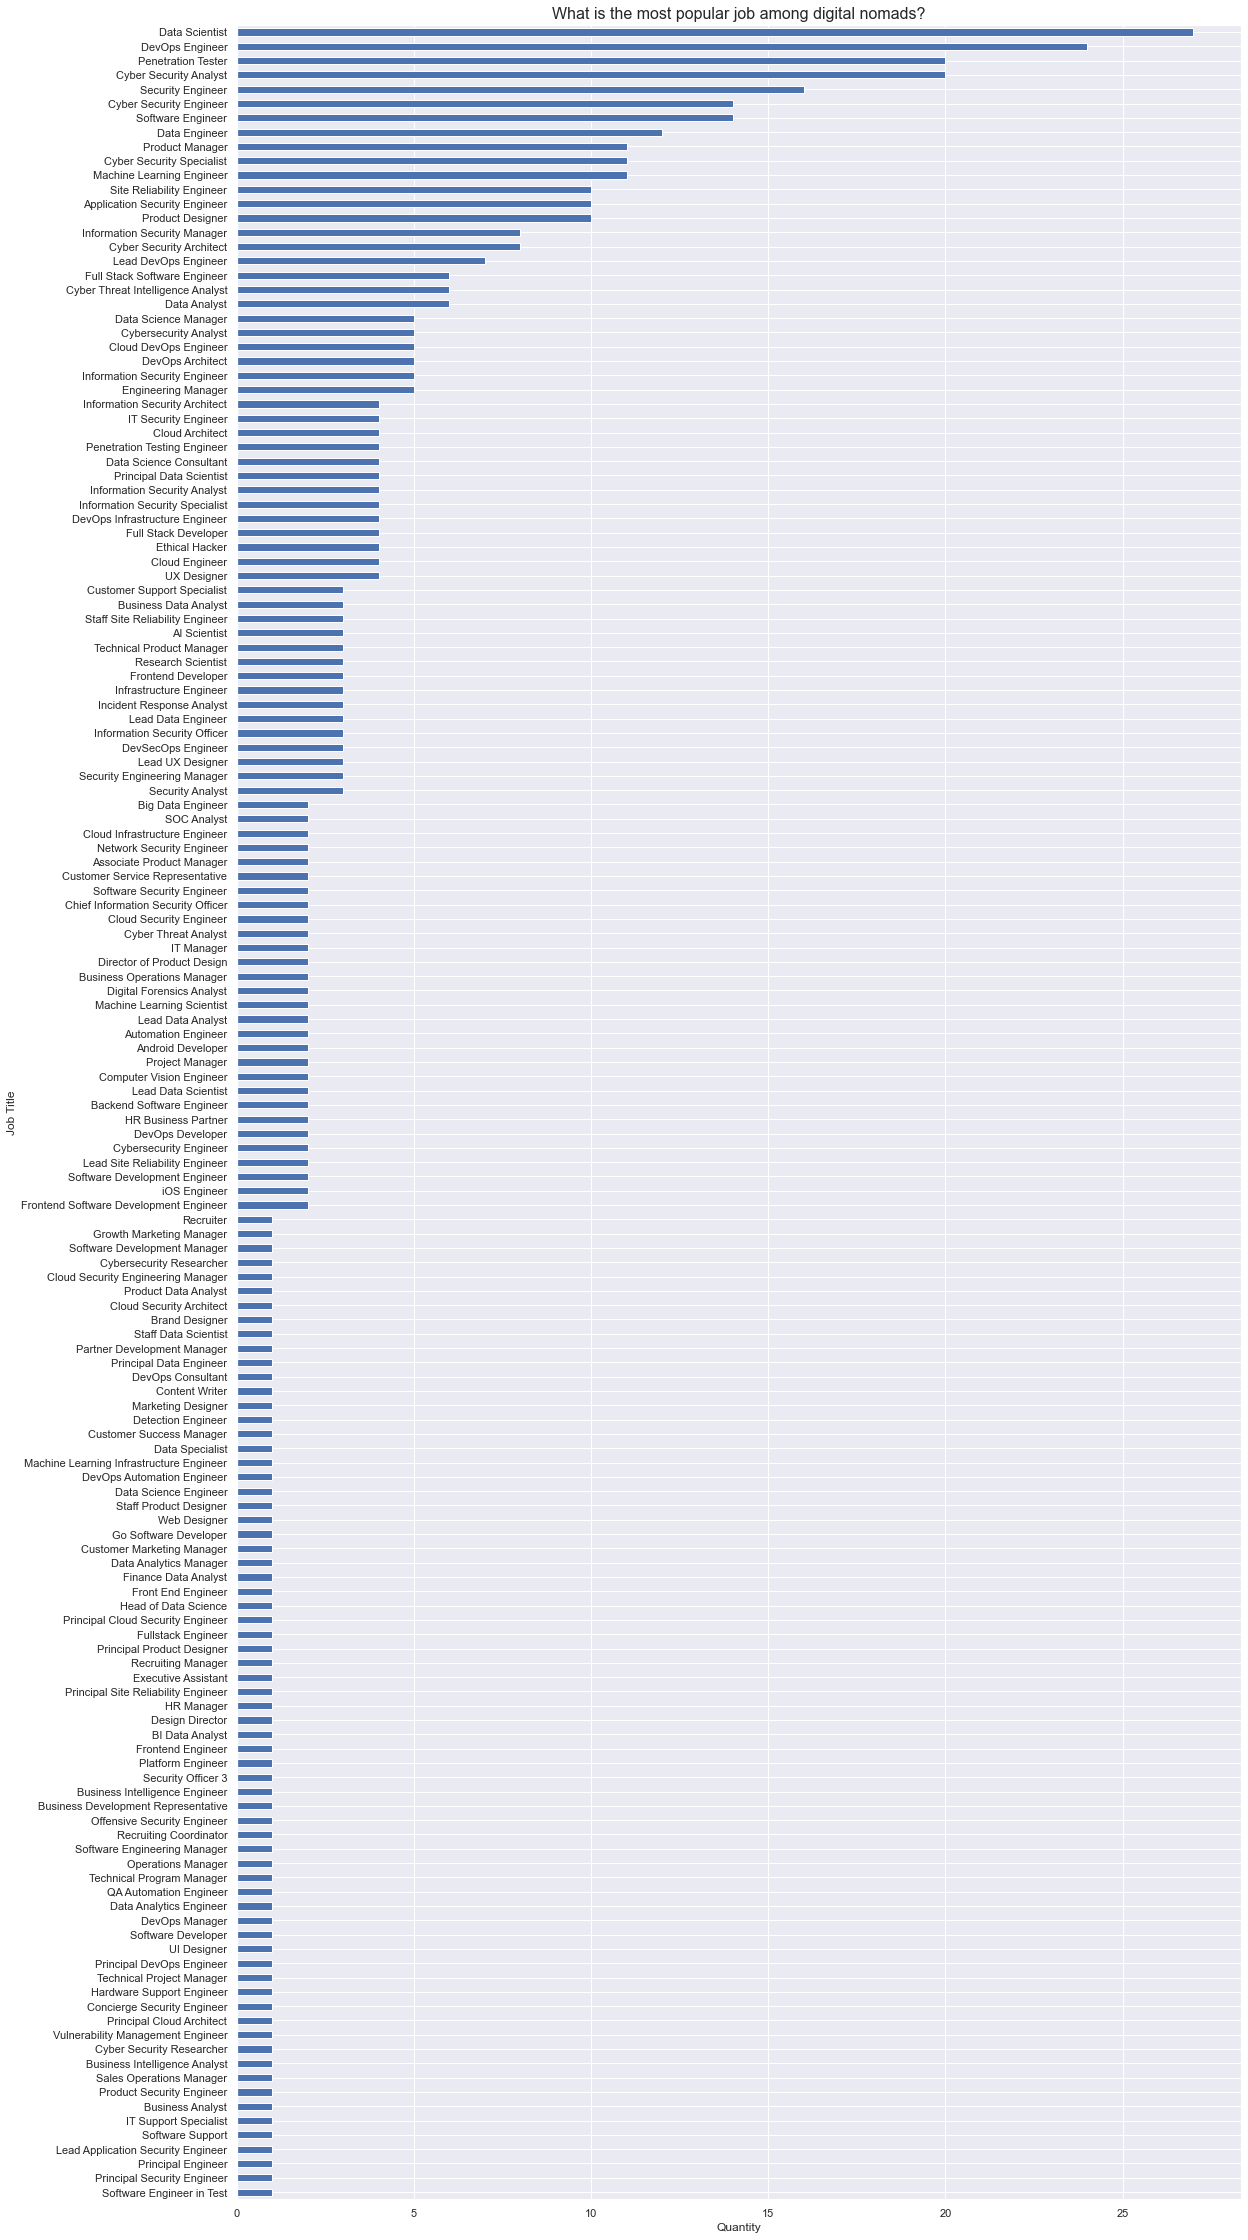

In [35]:
# Bar plot of Jobs distribution.
jobs.plot(kind='barh', figsize=(18,40))
plt.title('What is the most popular job among digital nomads?', fontsize= 16)
plt.ylabel('Job Title', fontsize= 12)
plt.xlabel('Quantity', fontsize= 12)
plt.show()

#### In which year were there more recruitments?

In [36]:
years = df['work_year'].value_counts()

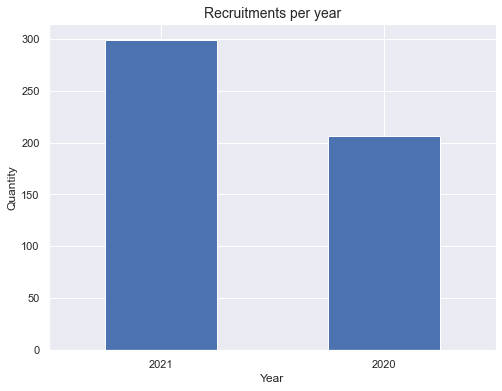

In [37]:
# Visualization.
years.plot(kind='bar', rot=0, figsize=(8,6))
plt.title('Recruitments per year', fontsize=14)
plt.ylabel('Quantity')
plt.xlabel('Year')
plt.show()

### Metrics in relation to the most demanded professions in the sample.

#### What was the most requested profession in 2020?

In [38]:
df.loc[(df.work_year==2020), ['work_year','job_title', 'experience_level']].mode()

,work_year,job_title,experience_level
0,2020,Software Engineer,SE


#### What was the most requested profession in 2021?

In [39]:
df.loc[(df.work_year==2021), ['work_year','job_title', 'experience_level']].mode()

,work_year,job_title,experience_level
0,2021,DevOps Engineer,SE


#### Top 10 most chosen professions among Digital Nomads

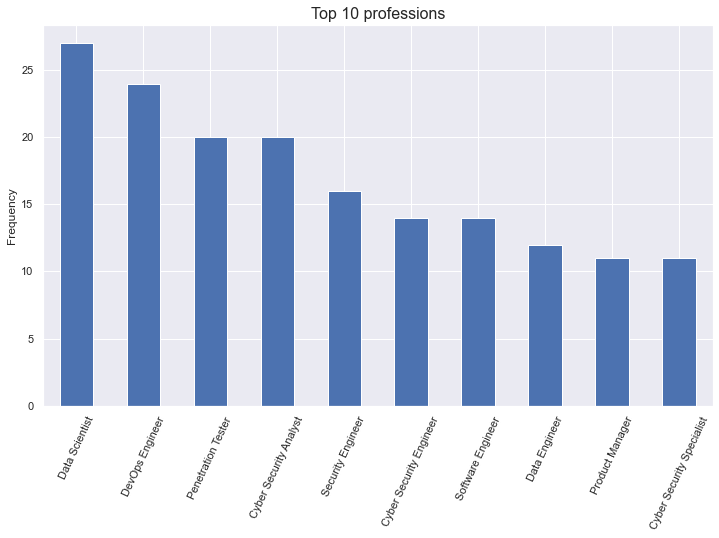

In [40]:
df['job_title'].value_counts().nlargest(10).plot(kind='bar', rot=65, figsize=(12,7))
plt.title('Top 10 professions', fontsize=16)
plt.ylabel('Frequency')
plt.show()

#### What is the average level of experience of Digital Nomads?

In [41]:
exp_lvl = df['experience_level'].value_counts().sort_values()

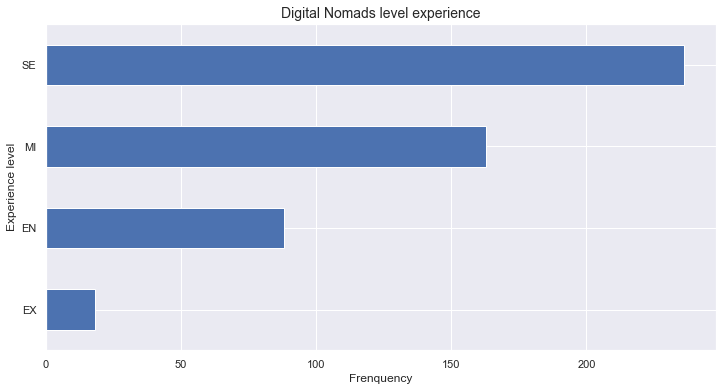

In [42]:
exp_lvl.plot(kind='barh', figsize=(12,6))
plt.title('Digital Nomads level experience', fontsize=14)
plt.ylabel('Experience level')
plt.xlabel('Frenquency')
plt.show()

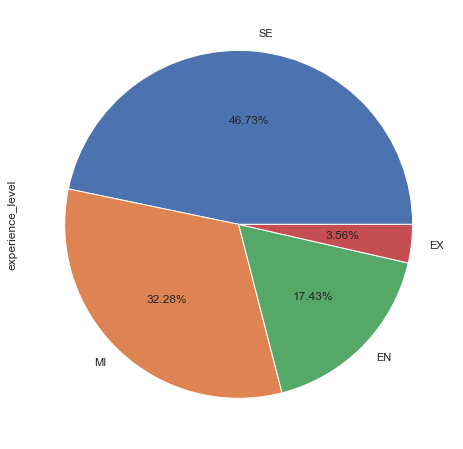

In [43]:
df['experience_level'].value_counts().plot.pie(figsize=(8, 8),autopct="%.2f%%");

#### What is the overall median salary for all professions?

In [44]:
total_median = df['salary_in_usd'].median()
total_jobs = jobs.sum()
print(f'The median salary of the {total_jobs} professions is: ${total_median} per year.')

The median salary of the 505 professions is: $89945.0 per year.


#### What is the standard salary deviation of all professions?

In [45]:
salaries_std = df['salary_in_usd'].std()
print(f'The standard wage deviation between the professions is: {salaries_std} per year.')

The standard wage deviation between the professions is: 54648.51739538969 per year.


#### Where are the main companies that hire Digital Nomads located?

In [46]:
companies = df['company_location'].value_counts().sort_values(ascending=False)

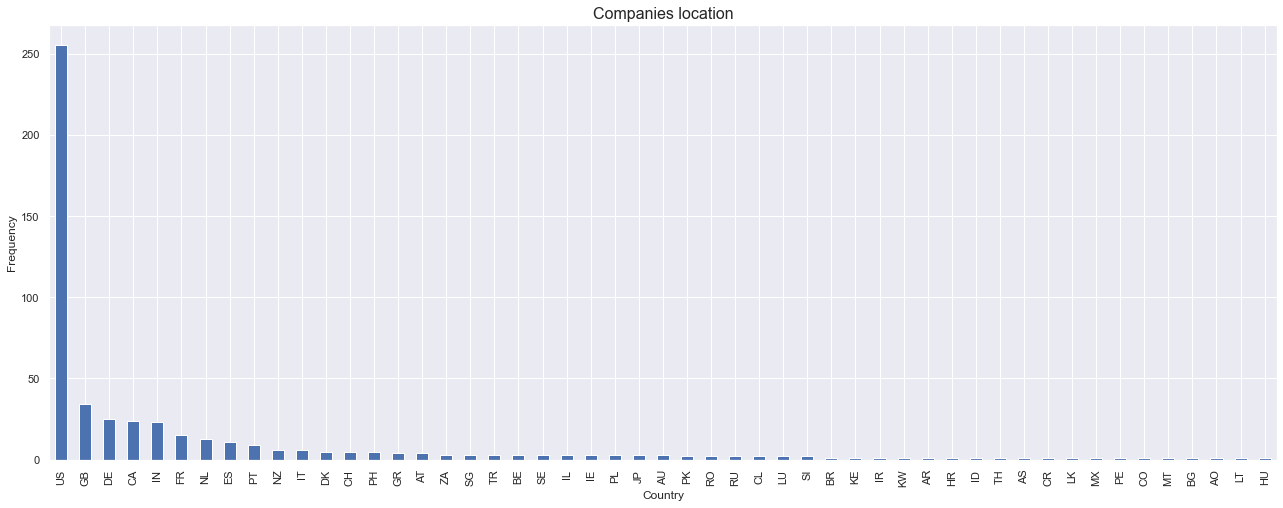

In [47]:
plt.title('Companies location', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Frequency')
companies.plot(kind='bar', figsize=(22,8))
plt.show()

### What is the most common type of employment contract for digital nomads?

In [48]:
contracts = df['employment_type'].value_counts()

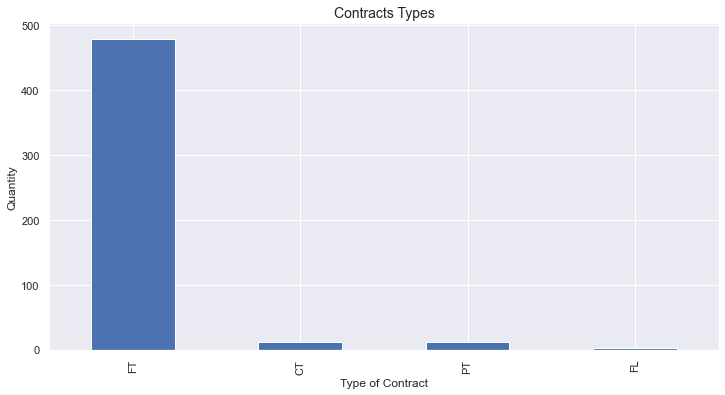

In [49]:
# Visualization
plt.title('Contracts Types', fontsize=14)
plt.xlabel('Type of Contract')
plt.ylabel('Quantity')
contracts.plot(kind='bar', figsize=(12,6))
plt.show()

#### Glossary:
- FT: Full Time
- PT: Part Time
- FL: Freelance

#### What is the most common method of working among Digital Nomads?

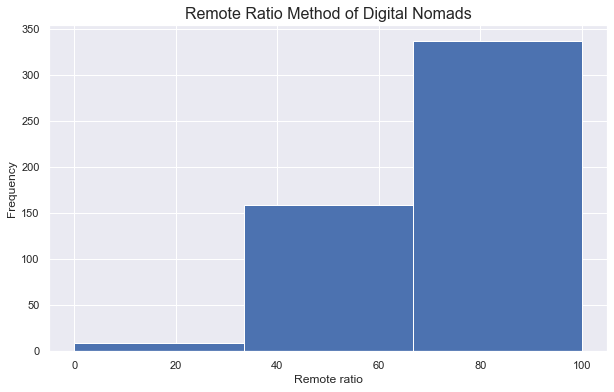

In [50]:
df['remote_ratio'].plot(kind='hist', bins=3, figsize=(10,6))
plt.title('Remote Ratio Method of Digital Nomads', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Remote ratio')
plt.show()

#### How is the size of the companies that Digital Nomads usually hires distributed?

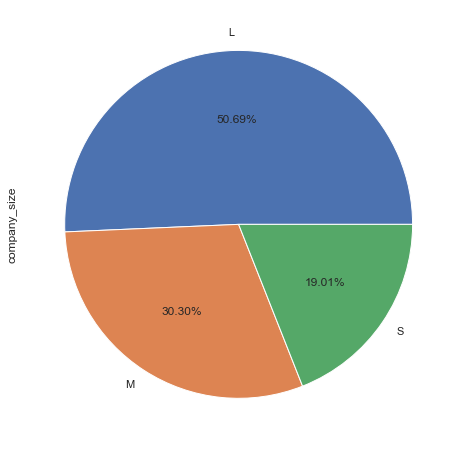

In [51]:
df['company_size'].value_counts().plot.pie(figsize=(8, 8),autopct="%.2f%%");

### Profession: Data Scientist

#### What is the median salary of Data Scientists for the three levels of experience?

In [52]:
data_sc = df.groupby('job_title').get_group('Data Scientist')

In [53]:
datascientist_salary = data_sc[['salary_in_usd', 'job_title', 'experience_level']].groupby(['job_title', 'experience_level']).mean()
datascientist_salary.head()

salary_in_usd
job_title      experience_level               
Data Scientist EN                 64582.000000
               MI                 77125.363636
               SE                104039.000000

#### For Entry Level

In [54]:
ds_en = data_sc[data_sc['experience_level']=='EN'].mean()[1]
print(f'The mean salary for EN Level Data Scientists is: ${ds_en}')

The mean salary for EN Level Data Scientists is: $64582.0


#### For Mid Level

In [55]:
ds_mi = data_sc[data_sc['experience_level']=='MI'].mean()[1]
print(f'The mean salary for MI Level Data Scientists is: ${ds_mi}')

The mean salary for MI Level Data Scientists is: $77125.36363636363


#### For Senior Level

In [56]:
ds_se = data_sc[data_sc['experience_level']=='SE'].mean()[1]
print(f'The mean salary for SE Level Data Scientists is: ${ds_se}')

The mean salary for SE Level Data Scientists is: $104039.0


#### Plot of the mean salary for the three level experience

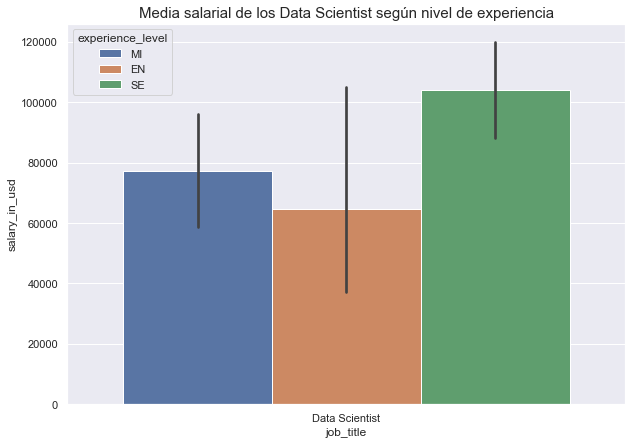

In [57]:
# Visualization
plt.figure(figsize=(10, 7))
sns.barplot(y='salary_in_usd',x='job_title',hue='experience_level',data=data_sc)
plt.title('Media salarial de los Data Scientist según nivel de experiencia', fontsize=15)
plt.show()

#### What is the GENERAL median salary for Data Scientists for the three levels of experience?

In [58]:
avg_datasc = df.loc[df['job_title']=='Data Scientist']['salary_in_usd'].mean()
print(f'The mean salary for Data Scientist is: ${avg_datasc}')

The mean salary for Data Scientist is: $77725.25925925926


#### What is the average level of experience of Data Scientist recruits?

In [59]:
exp_datasc = df.loc[df['job_title']=='Data Scientist']['experience_level'].mode()
print(f'The average level of experience of Data Scientists is: {exp_datasc[0]} level')

The average level of experience of Data Scientists is: MI level


#### What is the most common way Data Scientists work?

In [60]:
ratio_datasc = df.loc[df['job_title']=='Data Scientist']['remote_ratio'].mode()
print(f'The most frequent form of employment/recruitment for Data Scientists is: {ratio_datasc[0]}% remote')

The most frequent form of employment/recruitment for Data Scientists is: 50% remote


#### What is the size of the companies that tend to hire Data Scientists?

In [61]:
size_datasc = df.loc[df['job_title']=='Data Scientist']['company_size'].mode()
print(f'The most common size of company Data Scientists work in is: {size_datasc[0]}')

The most common size of company Data Scientists work in is: L


#### In which country do most Data Scientists reside?

In [62]:
loc_datasc = df.loc[df['job_title']=='Data Scientist']['employee_residence'].mode()
print(f'The average Data Scientist resides in: {loc_datasc[0]}')

The average Data Scientist resides in: US


### Data Scientists vs DevOps Engenieers Comparations

##### Salaries comparisons for the three levels of experience

In [63]:
df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'DevOps Engineer')][['job_title', 'experience_level', 'salary_in_usd']].groupby(['job_title', 'experience_level']).mean()

salary_in_usd
job_title       experience_level               
Data Scientist  EN                 64582.000000
                MI                 77125.363636
                SE                104039.000000
DevOps Engineer EN                 60978.250000
                MI                 56347.800000
                SE                100663.000000

##### From which countries are the largest number of Data Scientist & DevOps Engineers according to their level of experience?

In [64]:
df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'DevOps Engineer')][['job_title', 'experience_level', 'employee_residence']].groupby(['job_title', 'experience_level']).agg({'employee_residence': np.max})

employee_residence
job_title       experience_level                   
Data Scientist  EN                               US
                MI                               US
                SE                               US
DevOps Engineer EN                               US
                MI                               US
                SE                               US

##### Where is the highest proportion of companies hiring both professions, according to their level of experience?

In [65]:
df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'DevOps Engineer')][['job_title', 'experience_level', 'company_location']].groupby(['job_title', 'experience_level']).agg({'company_location': np.max})

company_location
job_title       experience_level                 
Data Scientist  EN                             US
                MI                             US
                SE                             US
DevOps Engineer EN                             US
                MI                             US
                SE                             US